**KATA KASAR DI TWITTER MENGGUNAKAN ALGORITMA SUPPORT VECTOR MACHINE (SVM)**

In [34]:
import pandas as pd
import numpy as np
import nltk
import sklearn

Tahap berikutnya melakukan perintah untuk membuka dataset mentah. Dataset kemudian disimpan didalam variabel datar dengan kolom bernama Konten.

Data bersumber dari tweet dengan hashtag ##TolakOmnibusLaw sebanyak 1000 data.

**PREPROCESSING**

**memanggil dataset**

Tahap berikutnya melakukan perintah untuk membuka dataset mentah. Dataset kemudian disimpan didalam variabel datar.

In [35]:
datar = pd.read_csv('twitter_hashtag.csv',encoding='latin1')

print(datar['content'])

0      Yg dah follow dan mau di fb duluan tingglin je...
1      How can dpr members who swear in the name of t...
2      âPEJABATâ: \nlahir dari RAKYAT, menjabat j...
3      If you're listening to this, you are the resis...
4      No Justice, no peace fuck the police \n\n#Tola...
                             ...                        
995    Memperingati satu tahun Jokowi yang langsung m...
996    Simak fakta &amp; argumentasi Asfinawati, Dire...
997    RUU yang telah disahkan oleh Sidang Paripurna,...
998    Trus bergerak kawan... #MahasiswaBergerak\n#To...
999    Conto kerja keras tanpa keringat. https://t.co...
Name: content, Length: 1000, dtype: object


Tahap berikutnyaa yaitu pengambilan data yang ada dalam variabel content kemudian dilakukan perintah cleansing dan case folding. Cleansing dan case folding dilakukan pada  dengan menggunakan modul re dari regex dan  string untuk mendeteksi kata. Hal ini bertujuan untuk membersihkan data dari emoticon, url dan teks yang tidak jelas, kemudian disimpan kembali didalam variabel yang sama yaitu dan datar dan kolom content.

In [36]:
from nltk.tokenize import TweetTokenizer

def identify_tokens(row):
    description = row['content']
    tokens = nltk.word_tokenize(str(description))
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

datar['Word'] = datar.apply(identify_tokens, axis=1)
print(datar['Word'])

0      [Yg, dah, follow, dan, mau, di, fb, duluan, ti...
1      [How, can, dpr, members, who, swear, in, the, ...
2      [lahir, dari, RAKYAT, menjabat, jadi, MOSITIDA...
3      [If, you, listening, to, this, you, are, the, ...
4      [No, Justice, no, peace, fuck, the, police, To...
                             ...                        
995    [Memperingati, satu, tahun, Jokowi, yang, lang...
996    [Simak, fakta, amp, argumentasi, Asfinawati, D...
997    [RUU, yang, telah, disahkan, oleh, Sidang, Par...
998    [Trus, bergerak, kawan, MahasiswaBergerak, Tol...
999    [Conto, kerja, keras, tanpa, keringat, https, ...
Name: Word, Length: 1000, dtype: object


Proses Tokenize pada gambar diatas bertujuan untuk membuat data tepisah kata perkata. Library yang digunakan yaitu TweetTokenize yang berasal dari Library NLTK, kemudian disimpan lagi di variabel datar dengan nama kolom baru 
yaitu Word.

Selanjutnya yaitu proses stemming. Proses stemming dilakukan menggunakan library Sastrawi. Library Sastrawi adalah library yang digunakan layaknya kamus, namun berisi kamus bahasa 
Indonesia berisi kata dasar. Jadi stemming dilakukan untuk merubah kalimat berimbuhan dan merubahnya menjadi kata dasar. Hasil dari tahap stemming ini disimpan ke dalam variabel yang sama yaitu datar dengan nama kolom baru, yaitu stemmed_word.

In [37]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
indostemming = factory.create_stemmer()

def stem_list(row):
    my_list = row['Word']
    stemmed_list = [indostemming.stem(word) for word in my_list]
    return(stemmed_list)

datar['Stemmed_Word'] = datar.apply(stem_list, axis=1)
print(datar['Stemmed_Word'])

0      [yg, dah, follow, dan, mau, di, fb, duluan, ti...
1      [how, can, dpr, members, who, swear, in, the, ...
2      [lahir, dari, rakyat, jabat, jadi, mositidakdi...
3      [if, you, listening, to, this, you, are, the, ...
4      [no, justice, no, peace, fuck, the, police, to...
                             ...                        
995    [ingat, satu, tahun, jokowi, yang, langsung, t...
996    [simak, fakta, amp, argumentasi, asfinawati, d...
997    [ruu, yang, telah, sah, oleh, sidang, paripurn...
998    [trus, gerak, kawan, mahasiswabergerak, tolako...
999    [conto, kerja, keras, tanpa, keringat, https, ...
Name: Stemmed_Word, Length: 1000, dtype: object


Tahap selanjutnya menggunakan library NLTK.corpus dengan modul stopword untuk mendeteksi kosakata dan kalimat yang sering keluar pada sistem dan menghapus kata sambung. Kemudian data di simpan ke dalam variabel datar kembali namun 
dengan nama kolom baru dengan nama Stem_Meaningful

In [38]:
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
stops = set(stopwords.words("indonesian"))
stops_eng = set(stopwords.words("english"))

def remove_stops(row):
    my_list = row["Stemmed_Word"]
    meaningful_words = [w for w in my_list if not w in stops]
    meaningful_words = [w for w in meaningful_words if not w in stops_eng]
    meaningful_words = [stopword.remove(w) for w in meaningful_words]
    return(meaningful_words)

datar['Stem_Meaningful'] = datar.apply(remove_stops, axis=1)
print(datar['Stem_Meaningful'])

0      [yg, dah, follow, fb, duluan, tingglin, jejak,...
1      [dpr, members, swear, name, god, betray, peopl...
2      [lahir, rakyat, jabat, mositidakdipercaya, cab...
3      [listening, resistence, tolakomnibuslaw, menol...
4      [justice, peace, fuck, police, tolakuuciptaker...
                             ...                        
995    [jokowi, langsung, jati, kolega, mositidakperc...
996    [simak, fakta, amp, argumentasi, asfinawati, d...
997    [ruu, sah, sidang, paripurna, sidang, paripurn...
998    [trus, gerak, kawan, mahasiswabergerak, tolako...
999        [conto, kerja, keras, keringat, https, https]
Name: Stem_Meaningful, Length: 1000, dtype: object


Kemudian seluruh data yang sudah diproses didalam kolom baru pada variabel datar di gabungkan dengan data sebelumnya dengan nama variabel baru yaitu Processed melalui fungsi rejoin_word.

In [39]:
def rejoin_words(row):
    my_list = row['Stem_Meaningful']
    joined_words = (" ".join(my_list))
    return joined_words

datar['Processed'] = datar.apply(rejoin_words, axis=1)
print(datar['Processed'])
print(list(datar))

0      yg dah follow fb duluan tingglin jejak twit to...
1      dpr members swear name god betray people makin...
2      lahir rakyat jabat mositidakdipercaya cabutomn...
3      listening resistence tolakomnibuslaw menolakpu...
4      justice peace fuck police tolakuuciptakerja to...
                             ...                        
995    jokowi langsung jati kolega mositidakpercaya r...
996    simak fakta amp argumentasi asfinawati direktu...
997    ruu sah sidang paripurna sidang paripurna hapu...
998    trus gerak kawan mahasiswabergerak tolakomnibu...
999               conto kerja keras keringat https https
Name: Processed, Length: 1000, dtype: object
['tweetDate', 'content', 'twitterProfile', 'tweetUrl', 'timestamp', 'query', 'Word', 'Stemmed_Word', 'Stem_Meaningful', 'Processed']


Data yang sudah digabungkan tadi akan memiliki banyak kolom yang tidak terpakai akibat penggabungan pada proses preprocessing data, oleh karena itu diperlukan proses penghapusan data oleh sistem menggunakan perintah drop seperti pada code dibawah sehingga menyisakan data dengan nama variabel label dan processed csv baru

In [40]:
cols_to_drop = ['content', 'Word', 'Stemmed_Word', 'Stem_Meaningful']
datar = datar.drop(cols_to_drop, axis = 'columns')

datar.to_csv('twitter_hashtag_baru.csv', index=False)

**MODELLING**

Setelah melewati tahap data preprocessing hingga menghasilkan data baru, selanjutnya tahap modelling. Modelling yang dilakukan juga telah dimplementasikan ke dalam kode Python dengan menggunakan algoritma Support Vector Machine (Support Vector Machine). Berikut merupakan tahapan pembuatan 
model dari Sentiment Analysis klasifikasi Kata Kasar dan Bukan Kata Kasar :

sebelumnya kita melakukan perintah pembacaan data kembali pada data yang sudah selesai diproses melalui tahapan preprocessing data untuk persiapan proses modelling.

In [2]:
import pandas as pd
import numpy as np
import nltk
import sklearn

In [3]:
datas = pd.read_csv('twitter_hashtag_kedua.csv')

print(datas)
print(datas.columns)

       Label                                          Processed
0    POSITIF  yg dah follow fb duluan tingglin jejak twit to...
1    POSITIF  dpr members swear name god betray people makin...
2    POSITIF  justice peace fuck police tolakuuciptakerja to...
3    POSITIF  tuantigabelas fought system tolakomnibuslaw https
4    POSITIF   come back mositidakpercaya tolakomnibuslaw https
..       ...                                                ...
994  POSITIF  semangat janganberhentibergerak tolakomnibusla...
995  POSITIF  semangat janganberhentibergerak tolakomnibusla...
996  POSITIF  semangat janganberhentibergerak tolakomnibusla...
997  POSITIF  semangat janganberhentibergerak tolakomnibusla...
998  POSITIF  semangat janganberhentibergerak tolakomnibusla...

[999 rows x 2 columns]
Index(['Label', 'Processed'], dtype='object')


Number of rows label
NEGATIF    704
POSITIF    295
Name: Label, dtype: int64



<function matplotlib.pyplot.show(*args, **kw)>

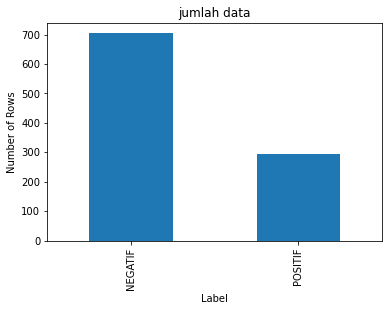

In [4]:
import matplotlib.pyplot as plt

print('Number of rows label')
print(datas['Label'].value_counts())
print('')
plt.figure()
pd.value_counts(datas['Label']).plot.bar(title="jumlah data")
plt.xlabel('Label')
plt.ylabel('Number of Rows')
plt.show 

In [8]:
def get_top_data(top_n = 1000):
    datas_positive = datas[datas['Label'] == 'POSITIF'].head(top_n)
    datas_negative = datas[datas['Label'] == 'NEGATIF'].head(top_n)
    datas_small = pd.concat([datas_positive,datas_negative])
    return datas_small

datas_small = get_top_data(top_n=855)

print("Jumlah data dari setiap label :")
print((datas_small['Label'].value_counts()))
datas_small.head(10)

Jumlah data dari setiap label :
NEGATIF    704
POSITIF    295
Name: Label, dtype: int64


,Label,Processed
0,POSITIF,yg dah follow fb duluan tingglin jejak twit to...
1,POSITIF,dpr members swear name god betray people makin...
2,POSITIF,justice peace fuck police tolakuuciptakerja to...
3,POSITIF,tuantigabelas fought system tolakomnibuslaw https
4,POSITIF,come back mositidakpercaya tolakomnibuslaw https
5,POSITIF,omnibus law threatens indigenous peoples tradi...
7,POSITIF,poster said born people took office mositidakp...
8,POSITIF,goes jakarta elites reformasidikorupsi tolakom...
9,POSITIF,visited bogor palace still meet students peopl...
10,POSITIF,think movie scene photo indonesian student pro...


Gambar diatas menunjukkan proses sampling data. Sampling data dilakukan karena jumlah perbandingan data antara positif dan negatif tidak sama. Sampling data yang dilakukan sesuai dengan jumlah data negatif yaitu 704.

In [13]:
import time
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x = datas.Processed
y = datas.Label

x_small = datas_small.Processed
y_small = datas_small.Label

n_test_split = [0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50]
tvec = TfidfVectorizer(min_df=5, max_df =0.8, sublinear_tf = True, use_idf = True)

for test in n_test_split:
    x_train, x_test, y_train, y_test = train_test_split(x_small, y_small, test_size = test)
    
    print('Banyak data x_train : ',len(x_train))
    print('Banyak data x_test : ',len(x_test))
    print('Banyak data y_train : ',len(y_train))
    print('Banyak data y_test : ',len(y_test))
    print(' ')
    print(' ')

Banyak data x_train :  899
Banyak data x_test :  100
Banyak data y_train :  899
Banyak data y_test :  100
 
 
Banyak data x_train :  849
Banyak data x_test :  150
Banyak data y_train :  849
Banyak data y_test :  150
 
 
Banyak data x_train :  799
Banyak data x_test :  200
Banyak data y_train :  799
Banyak data y_test :  200
 
 
Banyak data x_train :  749
Banyak data x_test :  250
Banyak data y_train :  749
Banyak data y_test :  250
 
 
Banyak data x_train :  699
Banyak data x_test :  300
Banyak data y_train :  699
Banyak data y_test :  300
 
 
Banyak data x_train :  649
Banyak data x_test :  350
Banyak data y_train :  649
Banyak data y_test :  350
 
 
Banyak data x_train :  599
Banyak data x_test :  400
Banyak data y_train :  599
Banyak data y_test :  400
 
 
Banyak data x_train :  549
Banyak data x_test :  450
Banyak data y_train :  549
Banyak data y_test :  450
 
 
Banyak data x_train :  499
Banyak data x_test :  500
Banyak data y_train :  499
Banyak data y_test :  500
 
 


Gambar diatas menunjukkan proses split data secara looping sebanyak 9 kali agar menghasilkan akurasi yang optimal.

Langkah berikutnya menambahkan perintah untuk mengimport library dan method yang dibutuhkan untu proses modelling dengan algoritma Support Vector Machine. Selain itu menuliskan metode klasifikasi Support Vector Machine dengan kernel linear. Selain itu, dituliskan fungsi klasifikasi 
menggunakan Support Vector Machine dengan kernel linear yang disimpan dalam variabel classifier_linear. Hasil klasifikasi tersebut menghasilkan nilai akurasi dengan menggunakan fungsi accuracy_score dan juga hasil evaluasi akanditampung menggunakan classification report untuk menghasilkan data evaluasi seperti akurasi, presisi dan recall.

In [16]:
train_vectors = tvec.fit_transform(x_train.values.astype('U'))
test_vectors = tvec.transform(x_test.values.astype('U'))

classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, y_train)
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1 - t0
time_linear_test = t2 - t1
report = classification_report(y_test, prediction_linear)
cfm = confusion_matrix(prediction_linear.astype(str),y_test.astype(str))

#print
print('klasifikasi %s' % (test))
print("Waktu training : %fs; Waktu Test: %fs" % (time_linear_train,time_linear_test))
print(' ')
print("Final Accuracy: %s" % accuracy_score(y_test,prediction_linear))
print(' ')
print('Report klasifikasi', report)
print(' ')
print('Confusion Matrix')
print(cfm)
print(' ')
print(' ')
print(' ')

klasifikasi 0.5
Waktu training : 0.011943s; Waktu Test: 0.008973s
 
Final Accuracy: 0.892
 
Report klasifikasi               precision    recall  f1-score   support

     NEGATIF       0.88      0.97      0.93       344
     POSITIF       0.92      0.72      0.81       156

    accuracy                           0.89       500
   macro avg       0.90      0.84      0.87       500
weighted avg       0.89      0.89      0.89       500

 
Confusion Matrix
[[334  44]
 [ 10 112]]
 
 
 


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

n_val = [5,6,7,8,9,10]
for n in n_val:
    kfold = KFold(n_splits=n)
    clf = svm.SVC(kernel='linear')
    scores = cross_val_score(clf, test_vectors, y_test, cv=kfold)
    
    print("cross validation k = %s" %(n))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print(' ')
    index = 0
    for i in scores:
        index += 1
        print('hasil akurasi cross validation : kfold', index)
        print("%0.2f" % i)
        print('')
    print('')
    print('')

cross validation k = 5
Accuracy: 0.89 (+/- 0.03)
 
hasil akurasi cross validation : kfold 1
0.91

hasil akurasi cross validation : kfold 2
0.89

hasil akurasi cross validation : kfold 3
0.90

hasil akurasi cross validation : kfold 4
0.86

hasil akurasi cross validation : kfold 5
0.89



cross validation k = 6
Accuracy: 0.89 (+/- 0.06)
 
hasil akurasi cross validation : kfold 1
0.92

hasil akurasi cross validation : kfold 2
0.88

hasil akurasi cross validation : kfold 3
0.90

hasil akurasi cross validation : kfold 4
0.87

hasil akurasi cross validation : kfold 5
0.84

hasil akurasi cross validation : kfold 6
0.93



cross validation k = 7
Accuracy: 0.89 (+/- 0.08)
 
hasil akurasi cross validation : kfold 1
0.94

hasil akurasi cross validation : kfold 2
0.86

hasil akurasi cross validation : kfold 3
0.89

hasil akurasi cross validation : kfold 4
0.92

hasil akurasi cross validation : kfold 5
0.83

hasil akurasi cross validation : kfold 6
0.86

hasil akurasi cross validation : kfold 7
0.9

Pengujian dilakukan untuk mengklasifikasi data ke arah negatif (tidak mengandung kata kasar) atau positif (mengandung kata kasar) dan menghasilkan 704 data negatif dan 295 data positif dari total jumlah 1000 data dari hashtag #TolakOmnibusLaw dan dilakukan sampling kembali setelah di 
lakukan tahap preprocessing data, dan dimasukkan ke dalam proses modelling dan menjadi data training dan data testing. Pengujian Sentiment Analysis akan menguji model yang telah dibuat untuk mengeluarkan akurasi dengan evaluasi melalui metode split data dan k-fold cross validation. Tujuannya adalah untuk mengevaluasi model yang telah dibuat dan 
memperoleh akurasi yang optimal dari kedua metode yang dipakai.